# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜: 2022.05.13
* 이름: 윤태우

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [ ]:
xv = np.array([3,5,5,7,8])
yv = np.array([20,50,60,90,100])
xv.shape, yv.shape

((5,), (5,))

* 데이터 시각화

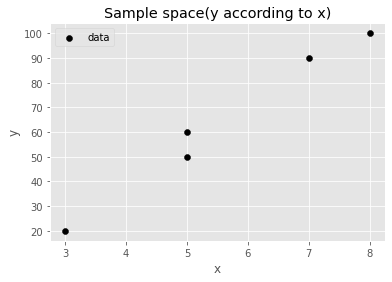

In [ ]:
plt.scatter(xv, yv, c = 'k', label = 'data')
plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [ ]:
def model_simple(x, w) :
  return (x*w)

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

In [ ]:
model_simple(xv,1)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
# propagation : 순전파
def propagation(xv,yv, w) :
  total_loss = 0
  for x,y in zip(xv,yv) : # 모든 샘플 x,y에 대해서
    y_pred = model_simple(x, w) # 예측값 구하기
    loss = np.abs(y_pred - y)       # 손실 구하기
    total_loss += loss              # 전체 샘플의 손실 구하기
  return total_loss
total_loss = propagation(xv,yv, 5)
print(f'total_loss : {total_loss}')

total_loss : 180


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


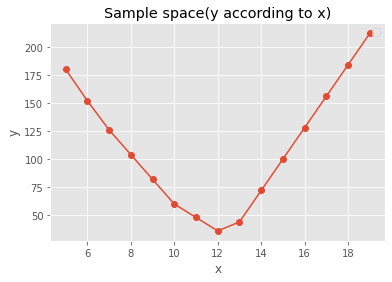

In [ ]:
wv = np.arange(5,20)
total_losses = propagation(xv,yv,wv) # w값에 따른 total loss 배열

# w값에 따른 total loss 시각화
plt.plot(wv, total_losses, marker = 'o')
plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend('')
plt.show()

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
w_ = 12
x_every = np.arange(11)
# print(x_every)
print(propagation(xv,yv, w_), model_simple(x_every, w_))
y_pred = model_simple(x_every, w_)

36 [  0  12  24  36  48  60  72  84  96 108 120]


* 학습 완료된 모델에 대한 예측 시각화

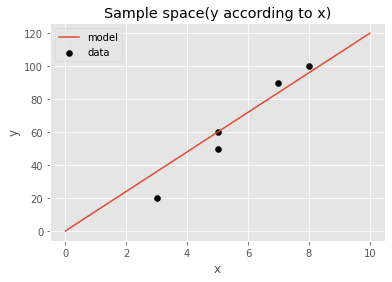

In [ ]:
# 데이터 시각화
plt.scatter(xv, yv, c = 'k', label = 'data')
# 모델 시각화
plt. plot(x_every, y_pred, label = 'model')

plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

* 공부시간이 6시간일 때 예상 점수는?


### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [ ]:
x_test = np.array([1,2,5,6,7])
y_test = np.array([5,15,55,80,85]) 

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [ ]:
total_loss = propagation(x_test,y_test, 12)
print(f'total_loss : {total_loss}')

total_loss : 30


* 학습 완료된 모델에 테스트 데이터 예측 시각화

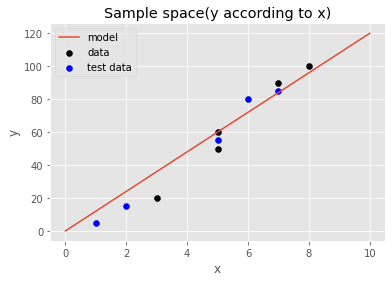

In [ ]:
# 데이터 시각화
plt.scatter(xv, yv, c = 'k', label = 'data')
# 모델 시각화
plt. plot(x_every, y_pred, label = 'model')

# 테스트 데이터 시각화
plt.scatter(x_test, y_test, c = 'b', label = 'test data')
plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [ ]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
yv = np.array([20,50,60,90,100])
X.shape, yv.shape

((5, 2), (5,))

* 데이터 시각화

No handles with labels found to put in legend.


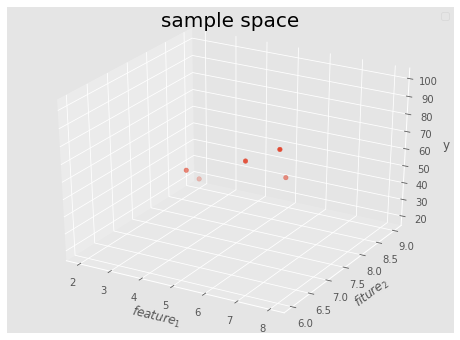

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection = '3d')

# x1(피쳐1), x2(피쳐2), yv
x1 = X[:,0]  # 모든 샘플 첫번째 피쳐
x2 = X[:,1]  # 모든 샘플 두번째 피쳐

ax.scatter3D(x1,x2,yv, cmap = 'coolwarm')

ax.set_title('sample space', size = 20)
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$fiture_2$')
ax.set_zlabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [ ]:
def model_multi(x1,x2,w1,w2) : # 찾아야 하는 학습 파라미터가 두개
  return x1*w1+x2*w2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|11|
|6|8|50|14|
|4|7|60|11|
|7|6|90|13|
|8|6|100|14|

In [ ]:
model_multi(X[:,0],X[:,1],1,1)

array([11, 14, 11, 13, 14])

In [ ]:
X[0][0]

2

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
# propagation : 순전파
def propagation(X,yv, w1, w2) :
  total_loss = 0
  for x,y in zip(X,yv) : # 모든 샘플 x,y에 대해서
    y_pred = model_multi(x[0], x[1], w1, w2) # 예측값 구하기
    loss = np.abs(y_pred - y)       # 손실 구하기
    total_loss += loss              # 전체 샘플의 손실 구하기
  return total_loss
total_loss = propagation(X,yv, 5, 10)
print(f'total_loss : {total_loss}')

total_loss : 175


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [ ]:
wv1 = np.arange(31)
wv2 = np.arange(-10,11)
W1, W2 = np.meshgrid(w1,w2)
L = propagation(X,yv, W1,W2)
W1.shape,W2.shape

((21, 31), (21, 31))

* 3d플롯으로 시각화

No handles with labels found to put in legend.


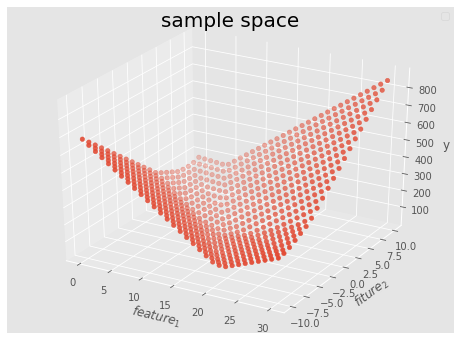

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection = '3d')

# W1, W2 , total_loss

ax.scatter3D(W1,W2,L)

ax.set_title('sample space', size = 20)
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$fiture_2$')
ax.set_zlabel('y')
plt.legend()
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [ ]:
w1_, w2_ = W1.flatten()[np.argmin(L)], W2.flatten()[np.argmin(L)]
w1_,w2_

(13, -1)

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
propagation(X,yv,w1_,w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

In [ ]:
x1_every = np.arange(10)
x2_every = np.arange(10)
X1_every,X2_every = np.meshgrid(x1_every, x2_every)
Y_pred = model_multi(X1_every, X2_every, w1_, w2_)

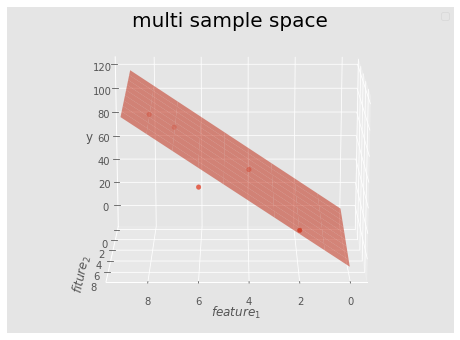

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection = '3d')

# x1(피쳐1), x2(피쳐2), yv
x1 = X[:,0]  # 모든 샘플 첫번째 피쳐
x2 = X[:,1]  # 모든 샘플 두번째 피쳐

# 데이터셋
ax.scatter3D(x1,x2,yv, cmap = 'coolwarm')
# 예측 모델
ax.plot_surface(X1_every, X2_every, Y_pred, alpha = .6)
ax.set_title('multi sample space', size = 20)
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$fiture_2$')
ax.set_zlabel('y')
ax.view_init(15, 90)
plt.legend('')
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [ ]:
model_multi(6,5,w1_,w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [ ]:
X_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
Y_test = np.array([15,25,60,90,95])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [ ]:
propagation(X_test, Y_test, w1_,w2_)

76

* 학습 완료된 모델에 테스트 데이터 예측 시각화

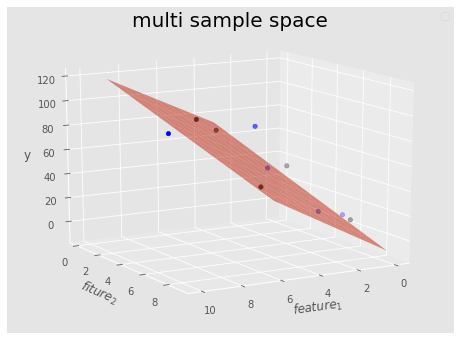

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection = '3d')

# x1(피쳐1), x2(피쳐2), yv
x1 = X[:,0]  # 모든 샘플 첫번째 피쳐
x2 = X[:,1]  # 모든 샘플 두번째 피쳐
x1_test = X_test[:,0]  # 데스트 데이터 첫번째 피쳐
x2_test = X_test[:,1]  # 테스트 데이터 두번째 피쳐

# 데이터셋
ax.scatter3D(x1,x2,yv, c = 'k')
# 예측 모델
ax.plot_surface(X1_every, X2_every, Y_pred, alpha = .6)

# 테스트 데이터
ax.scatter3D(x1_test,x2_test, Y_test, c = 'b')

ax.set_title('multi sample space', size = 20)
ax.set_xlabel('$feature_1$')
ax.set_ylabel('$fiture_2$')
ax.set_zlabel('y')
ax.view_init(15, 60)
plt.legend('')
plt.show()

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [78]:
class Model() :
  def __init__(self) :
    print('모델 클래스가 생성됩니다.')
    self.W = np.arange(30,301) #  예측값과 y가 가장 비슷하게 해주는 파라미터 w를 찾기위해 배열 생성
    self.w_=25   # loss 값을 최소로 만드는 w 값이 25이므로 w_로 바인딩
  def model_1(self, xv, W) :   # 예측값 리턴하는 함수
    return xv * W

  def propagation(self, xv,yv, w) :
    total_loss = 0
    for x,y in zip(xv,yv) : 
      y_pred = self.model_1(x, w) # 예측값 y_pred
      loss = np.abs(y_pred - y)       # 손실 loss
      total_loss += loss              # 전체 샘플의 손실 total_loss
    return total_loss/len(xv)   # 모든 로스 값의 합과 입력값의 길이로 나누면 로스의 평균.

  def fit(self,xv, yv): 
    for i in self.propagation(xv, yv, self.W) :
      print(f'최적화가 진행됩니다. 현재 loss : {i}')         # i값이 최소값일때까지 for문으로 최적화 진행중 문장과 loss를 출력
      if i == np.min(self.propagation(xv, yv, self.W)) :
        print(f'최적화 완료, loss : {i}')                    # if문을 통해 최적화가 완료 됐을때 loss값과 그 때의 w값 리턴
        return f'w = {np.argmin(self.propagation(xv, yv, self.W))}일때 최적'   # w = 25 일때 가장 loss가 적음

  def predict(self, xv) :
    print('예측을 진행합니다.')
    return self.model_1(xv, self.w_)

  def validation(self, xv, yv) :
    y_pred = self.model_1(xv,self.w_)
    return f'예측값 : {y_pred}, loss : {self.propagation(xv, yv , self.w_)}'

In [79]:
model = Model()
xv = np.array([1,2,3,4,8,10,12,17])
yv = np.array([100,300,400,500,600,650,660, 700])

모델 클래스가 생성됩니다.


In [80]:
model.fit(xv,yv)

최적화가 진행됩니다. 현재 loss : 275.0
최적화가 진행됩니다. 현재 loss : 267.875
최적화가 진행됩니다. 현재 loss : 260.75
최적화가 진행됩니다. 현재 loss : 253.625
최적화가 진행됩니다. 현재 loss : 246.5
최적화가 진행됩니다. 현재 loss : 239.375
최적화가 진행됩니다. 현재 loss : 232.25
최적화가 진행됩니다. 현재 loss : 225.125
최적화가 진행됩니다. 현재 loss : 218.0
최적화가 진행됩니다. 현재 loss : 210.875
최적화가 진행됩니다. 현재 loss : 203.75
최적화가 진행됩니다. 현재 loss : 196.625
최적화가 진행됩니다. 현재 loss : 193.0
최적화가 진행됩니다. 현재 loss : 190.125
최적화가 진행됩니다. 현재 loss : 187.25
최적화가 진행됩니다. 현재 loss : 184.375
최적화가 진행됩니다. 현재 loss : 181.5
최적화가 진행됩니다. 현재 loss : 178.625
최적화가 진행됩니다. 현재 loss : 175.75
최적화가 진행됩니다. 현재 loss : 172.875
최적화가 진행됩니다. 현재 loss : 170.0
최적화가 진행됩니다. 현재 loss : 167.125
최적화가 진행됩니다. 현재 loss : 164.25
최적화가 진행됩니다. 현재 loss : 161.375
최적화가 진행됩니다. 현재 loss : 158.5
최적화가 진행됩니다. 현재 loss : 155.625
최적화 완료, loss : 155.625


'w = 25일때 최적'

In [86]:
x_every = np.arange(100)
model.predict(x_every)

예측을 진행합니다.


array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
        275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
        550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
        825,  850,  875,  900,  925,  950,  975, 1000, 1025, 1050, 1075,
       1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350,
       1375, 1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625,
       1650, 1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850, 1875, 1900,
       1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100, 2125, 2150, 2175,
       2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400, 2425, 2450,
       2475])

In [87]:
xv_test = np.array([10,2,3,4,8,10,12,17])
yv_test = np.array([100,300,400,500,600,650,660, 700])

model.validation(xv_test, yv_test)

'예측값 : [250  50  75 100 200 250 300 425], loss : 320.0'

예측을 진행합니다.


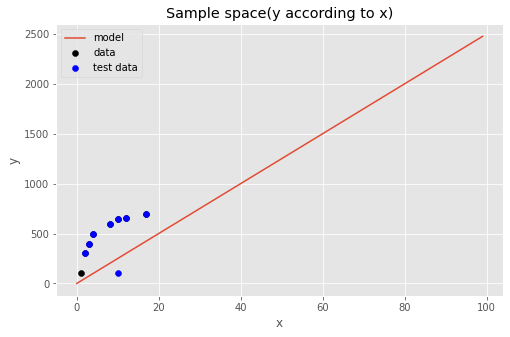

In [88]:
plt.figure(figsize = (8,5))

# 데이터 시각화
plt.scatter(xv, yv, c = 'k', label = 'data')
# 모델 시각화
plt. plot(x_every, model.predict(x_every), label = 'model')

# 테스트 데이터 시각화
plt.scatter(xv_test, yv_test, c = 'b', label = 'test data')
plt.title('Sample space(y according to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()